# Desafio de Ciência de Dados - IMDb 

In [37]:
# Importando as bibliotecas necessárias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

### 1 - Pré processamento e limpeza dos dados

In [38]:
# Carregando o dataset e imprimindo as 5 primeiras observações 
df = pd.read_csv("../data/desafio_indicium_imdb.csv")
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [39]:
# Exibindo o nome das colunas 
df.columns

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [40]:
# Exibindo a dimensionalidade do dataframe (linhas, colunas)
df.shape

(999, 16)

In [41]:
# Exibindo as informações sobre o dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [42]:
# Transformando as colunas "Released_year", "Runtime" e "Gross" para valores numéricos 

# Limpa as strings das colunas "Runtime" e "Gross", que possuem texto em seus valores 
df["Runtime"] = df["Runtime"].str.extract(r'(\d+)') # Extrai apenas os números de cada célula 
df["Gross"] = df["Gross"].str.replace(",", "", regex=False) # Substitui as vírgulas das células por valores vazios, tornando assim o valor das células apenas em números

# Converte para valores numéricos e substitui os erros por NaN
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df["Runtime"] = pd.to_numeric(df["Runtime"], errors="coerce")
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")

# Calculando a mediana 
mediana_meta_score = df["Meta_score"].median()
print(f"Mediana Meta Score: {mediana_meta_score}")
mediana_gross = df["Gross"].median()
print(f"Mediana faturamento: {mediana_gross}")

Mediana Meta Score: 79.0
Mediana faturamento: 23457439.5


In [43]:
# Preenchimento das colunas "Meta_score" e "Gross"
# Como nessas colunas há muitos valores nulos, o ideal é preenche-las de algumas forma ao invés de excluir as celulas com valores NaN

# Calculando a mediana 
mediana_meta_score = df["Meta_score"].median()
print(f"Mediana Meta Score: {mediana_meta_score}")
mediana_gross = df["Gross"].median()
print(f"Mediana faturamento: {mediana_gross}")

# Preenchendo com a mediana os valores nulos 
df["Meta_score"] = df["Meta_score"].fillna(mediana_meta_score)
df["Gross"] = df["Gross"].fillna(mediana_gross)

Mediana Meta Score: 79.0
Mediana faturamento: 23457439.5


In [44]:
# Preenchendo os valores ausentes da coluna "Certificate" 

# Por ser do tipo object, o preenchimento é a adição de uma categoria nova, de não avaliado
df["Certificate"] = df["Certificate"].fillna("Not Rated")

# Exclusão da celula de valor nulo na coluna "Released_year"
df.dropna(subset=["Released_Year"], inplace=True)

# Convertendo "Released_year" para int
df["Released_Year"] = df["Released_Year"].astype(int)

In [45]:
# Exibindo as informações do dataframe, após todas as transformações e balanceamentos terem sido realizados 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     998 non-null    int64  
 1   Series_Title   998 non-null    object 
 2   Released_Year  998 non-null    int64  
 3   Certificate    998 non-null    object 
 4   Runtime        998 non-null    int64  
 5   Genre          998 non-null    object 
 6   IMDB_Rating    998 non-null    float64
 7   Overview       998 non-null    object 
 8   Meta_score     998 non-null    float64
 9   Director       998 non-null    object 
 10  Star1          998 non-null    object 
 11  Star2          998 non-null    object 
 12  Star3          998 non-null    object 
 13  Star4          998 non-null    object 
 14  No_of_Votes    998 non-null    int64  
 15  Gross          998 non-null    float64
dtypes: float64(3), int64(4), object(9)
memory usage: 132.5+ KB


In [46]:
# Exibe a contagem de valores nulos por atributo
df.isnull().sum()

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [47]:
# Exibindo os dados estatísticos do dataframe 
df.describe()

,Unnamed: 0,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.000000,998.000000,998.000000,998.000000,998.000000,9.980000e+02,9.980000e+02
mean,499.533066,1991.214429,122.854709,7.948297,78.132265,2.716239e+05,6.041985e+07
std,288.297542,23.308539,28.110078,0.272203,11.379412,3.210735e+05,1.014568e+08
min,1.000000,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,250.250000,1976.000000,103.000000,7.700000,72.000000,5.541675e+04,5.010758e+06
50%,499.500000,1999.000000,119.000000,7.900000,79.000000,1.381685e+05,2.345744e+07
75%,748.750000,2009.000000,136.750000,8.100000,85.750000,3.735062e+05,6.144663e+07
max,999.000000,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


### 2 - Análise Exploratória 

In [48]:
# Frequência de distribuição das notas dos filmes - tabela 
df_tabela_dist = df["IMDB_Rating"].value_counts().sort_index()
df_tabela_dist

IMDB_Rating
7.6    122
7.7    157
7.8    151
7.9    106
8.0    141
8.1    127
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
8.9      3
9.0      3
9.2      1
Name: count, dtype: int64

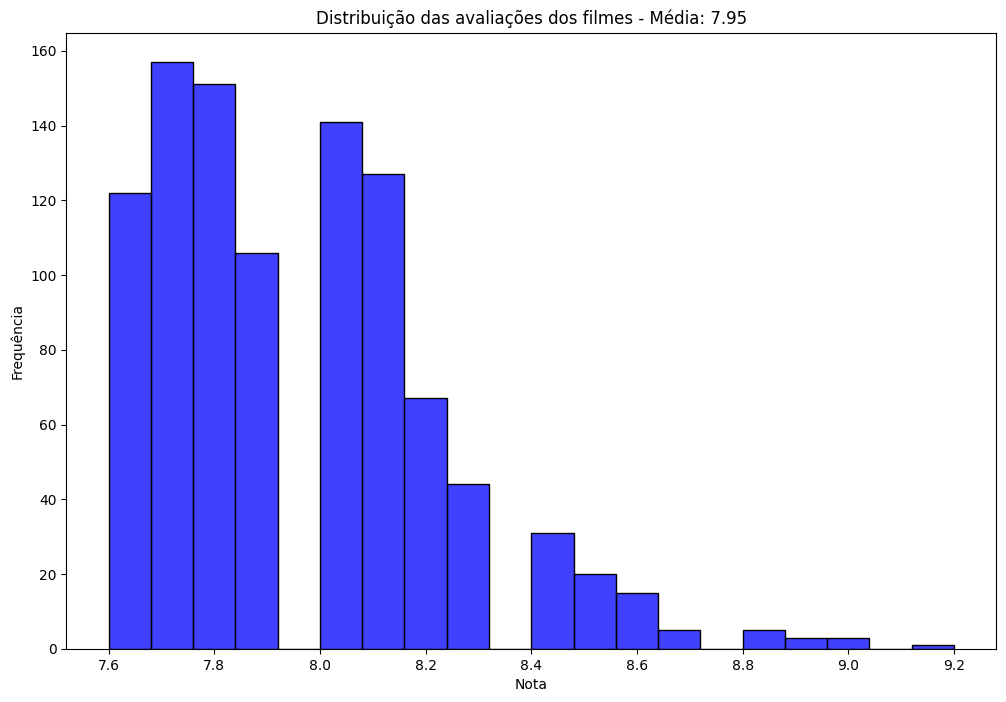

In [49]:
# Histograma mostrando a frequência de distribuição das notas dos filmes - gráfico
media_notas = np.mean(df["IMDB_Rating"])
plt.figure(figsize=(12, 8))
sns.histplot(df["IMDB_Rating"], color="blue")
plt.title(f"Distribuição das avaliações dos filmes - Média: {media_notas:.2f}")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

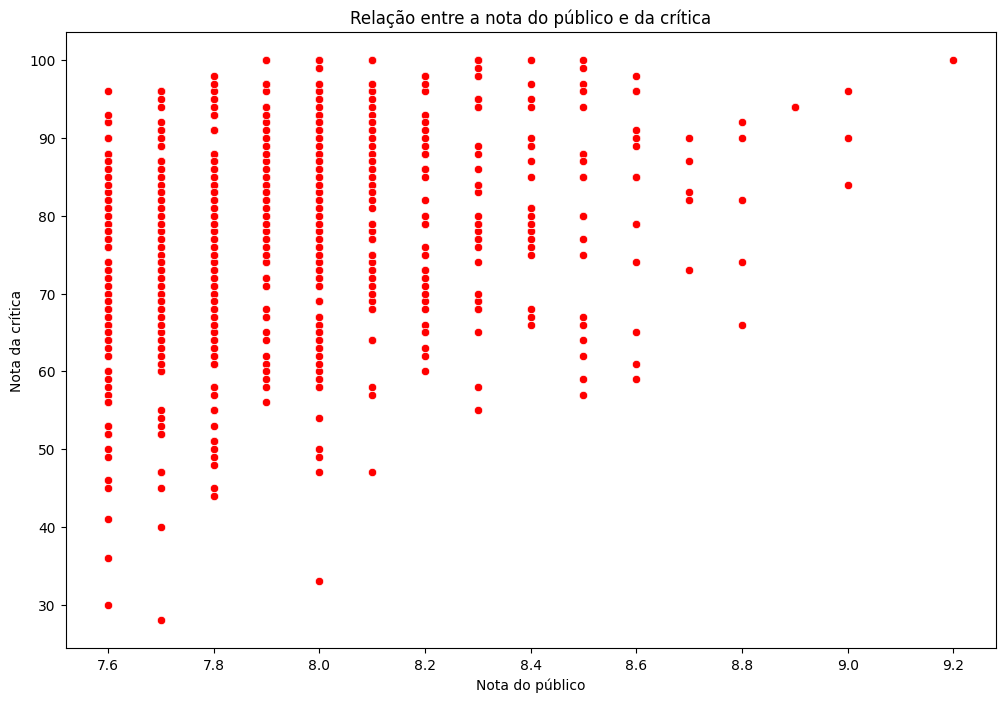

In [50]:
# Relação entre a nota do público e a nota da crítica 
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df["IMDB_Rating"], y=df["Meta_score"], color="red")
plt.title("Relação entre a nota do público e da crítica")
plt.xlabel("Nota do público")
plt.ylabel("Nota da crítica")
plt.show()

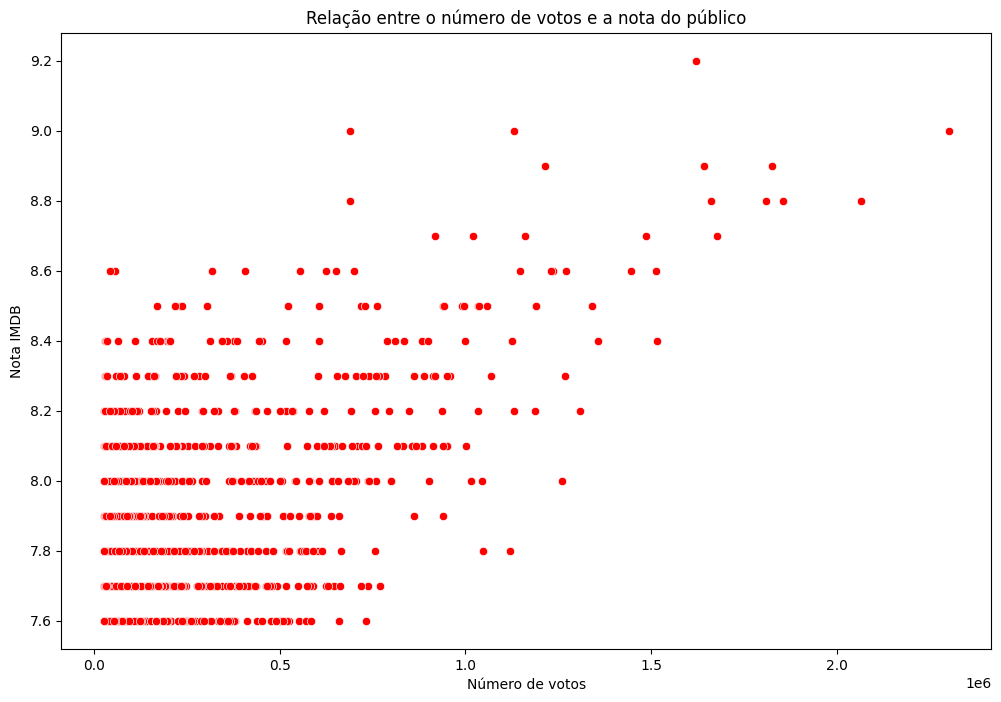

In [51]:
# Relação entre o número de votos e a nota do público
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df["No_of_Votes"], y=df["IMDB_Rating"], color="red")
plt.title("Relação entre o número de votos e a nota do público")
plt.xlabel("Número de votos")
plt.ylabel("Nota IMDB")
plt.show() 

**Insights obtidos após os gráficos de dispersão:**
- A nota do público (IMDB_Rating) tem correlação linear com a nota da crítica (Meta_score).
- O número de votos (No_of_Votes) implica em notas maiores do público (IMDB_Rating), indicando que também são linearmente correlacionados, e que um filme tende-se a ter uma maior nota do público quando se tem muitos votos.

In [52]:
# Exibindo a matriz de correlaçao entre os valores numéricos 
df_numericas = df.select_dtypes(include='number') 
df_numericas = df_numericas.drop("Unnamed: 0", axis=1) 
matriz_correlacao = df_numericas.corr() 
matriz_correlacao.style.background_gradient(cmap="RdBu", axis="columns") 

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,0.165765,-0.133257,-0.293888,0.246005,0.232659
Runtime,0.165765,1.000000,0.243778,-0.026423,0.172520,0.138057
IMDB_Rating,-0.133257,0.243778,1.000000,0.261097,0.479691,0.089700
Meta_score,-0.293888,-0.026423,0.261097,1.000000,-0.028559,-0.051787
No_of_Votes,0.246005,0.172520,0.479691,-0.028559,1.000000,0.603091
Gross,0.232659,0.138057,0.089700,-0.051787,0.603091,1.000000


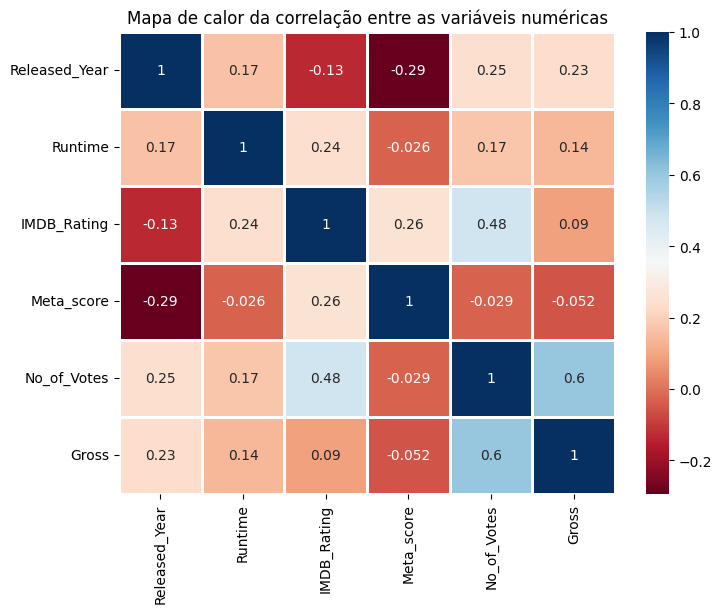

In [53]:
# Plotando a matriz de correlação com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, 
            xticklabels=df_numericas.columns, 
            yticklabels=df_numericas.columns,
            annot=True,
            linewidth=2,
            cmap="RdBu")
plt.title("Mapa de calor da correlação entre as variáveis numéricas") 
plt.show() 

**Insights obtidos a partir da matriz de correlação** 
- O número de votos está relacionado ao faturamento do filme, ou seja, quanto mais popular um filme mais alto tende-se a ser o faturamento. 
- A nota da crítica atribuída a um filme tem uma correlação fraca com o seu ano de lançamento, indicando que filmes mais antigos podem ter notas mais altas que filmes mais recentes. 
- A nota da crítica e do público possuem correlação linear fraca ou próxima de zero com o seu faturamento. 
- O ano de lançamento e a duração do filme possuem correlação fraca com o faturamento, indicando uma pequena tendência de filmes mais recentes e com uma maior duração ter um faturamento maior.

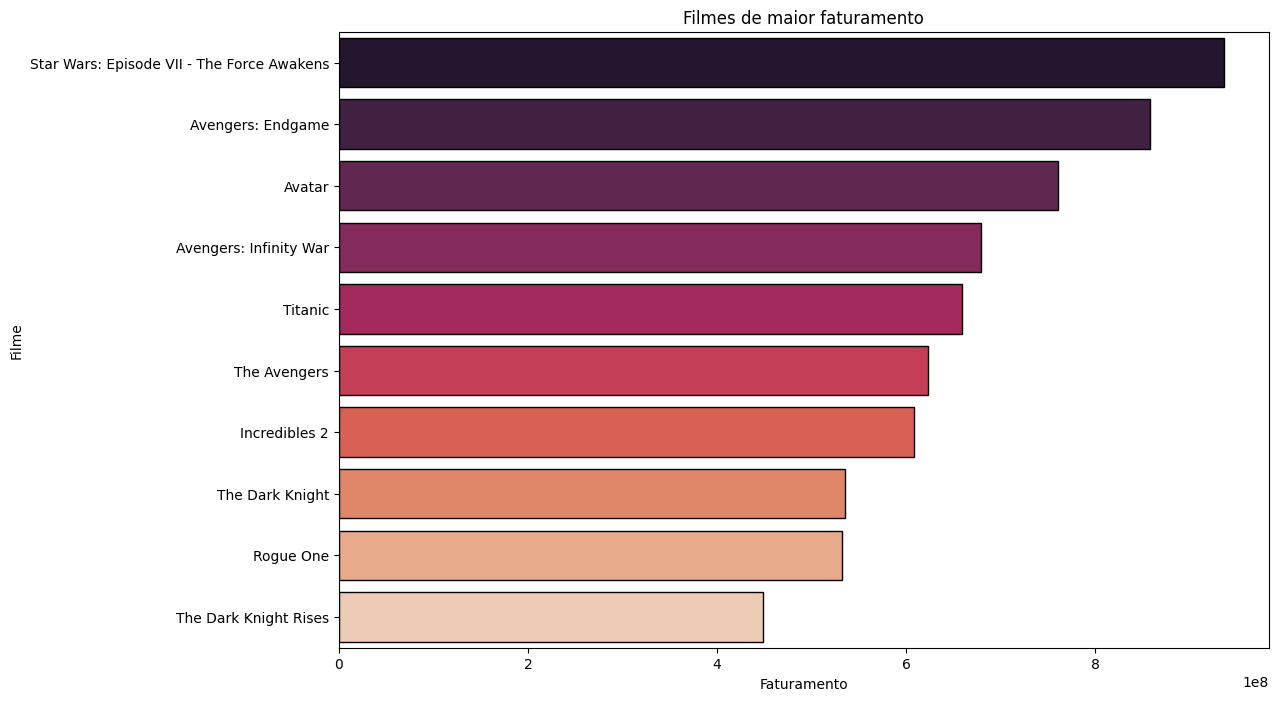

In [54]:
# Filmes de maior faturamento 
df_top_faturamento = df.sort_values(by="Gross", ascending=False).head(10) 
plt.figure(figsize=(12,8)) 
sns.barplot(x="Gross", y="Series_Title", data=df_top_faturamento, palette='rocket', edgecolor="black", hue="Series_Title") 
plt.title("Filmes de maior faturamento") 
plt.xlabel("Faturamento") 
plt.ylabel("Filme") 
plt.show() 

In [55]:
# Exibindo gêneros de fimes mais populares 
df_generos_mais_populares = df["Genre"].str.split(", ").explode().value_counts().head(10) 
df_generos_mais_populares 

Genre
Drama        722
Comedy       233
Crime        209
Adventure    195
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Name: count, dtype: int64

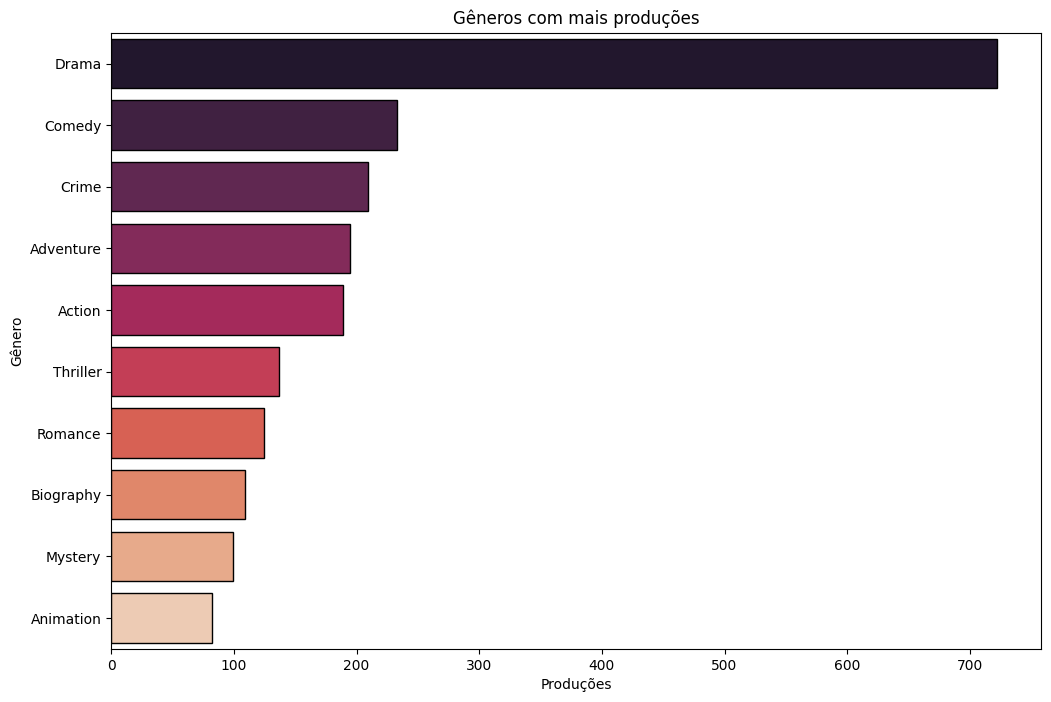

In [56]:
# Exibindo a quantidade de filmes dentre os gêneros mais populares 
plt.figure(figsize=(12, 8)) 
sns.barplot(x=df_generos_mais_populares.values, y=df_generos_mais_populares.index, palette='rocket', edgecolor="black", hue=df_generos_mais_populares.index) 
plt.title("Gêneros com mais produções") 
plt.xlabel("Produções") 
plt.ylabel("Gênero") 
plt.show() 

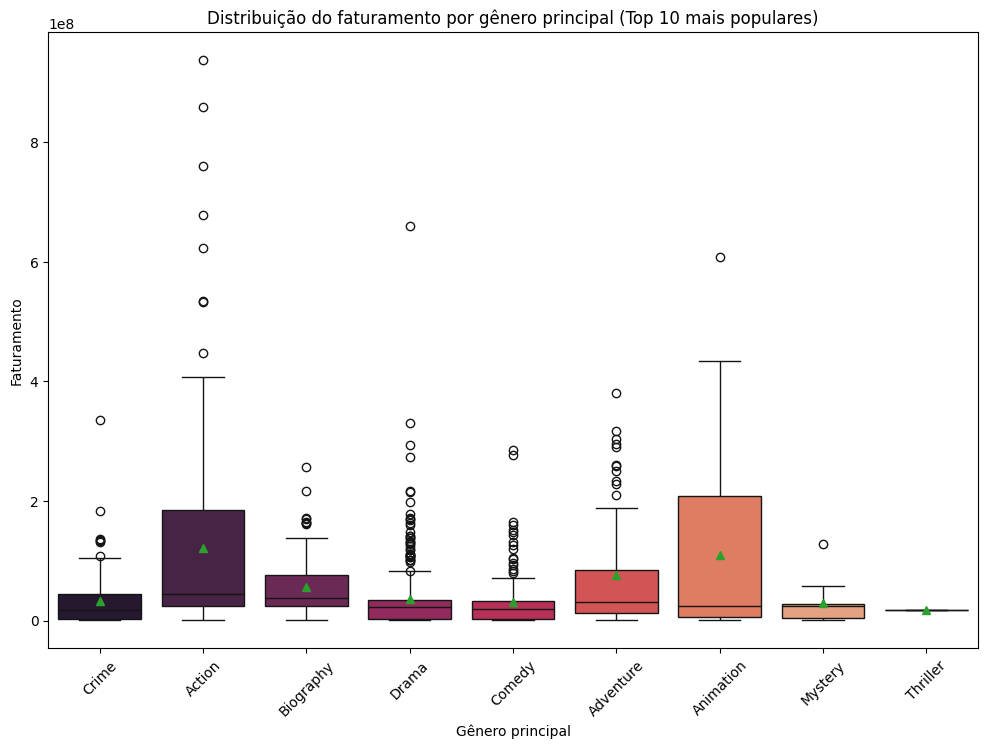

In [57]:
# Pegando apenas o primeiro gênero da lista 
df["Genero_Principal"] = df["Genre"].str.split(",").str[0] 

# Agora filtra apenas os gêneros mais populares
df_faturamento_top10_generos = df[df["Genero_Principal"].isin(df_generos_mais_populares.index)] 

# Criando o boxplot 
plt.figure(figsize=(12, 8)) 
sns.boxplot(x="Genero_Principal", y="Gross", data=df_faturamento_top10_generos, palette="rocket", showmeans=True, hue="Genero_Principal") 
plt.xticks(rotation=45) 
plt.title("Distribuição do faturamento por gênero principal (Top 10 mais populares)") 
plt.xlabel("Gênero principal") 
plt.ylabel("Faturamento") 
plt.show() 

**Insights obtidos após o boxplot**
- Os maiores outliers (blockbusters) são dos gêneros: ação (8 filmes), drama (1 filme) e animação (1 filme). 
- Filmes de ação são os de maiores sucessos de faturamento, possuem a maior média e mediana dentro da amostra observada. Além disso, os maiores sucessos de faturamento no geral são desse gênero, com filmes como: Avatar, Vingadores e Star Wars. 
- Mesmo com menor volume de produções, os filmes de animação mostram alto potencial lucrativo e de bilheteira, indicando que principalmente o público infantil tem enorme peso na industria cinematográfica. O filme "Os Incríveis 2", por exemplo, é um dos maiores sucessos. 
- O gênero drama, apesar de ter o maior número de produções, apresenta menor mediana e maior variância de faturamento. Ainda assim, Titanic se destaca como um dos filmes mais rentáveis da história.  
- Filmes dos gêneros mistério e thriller não são tão lucrativos comparados aos demais. 

In [58]:
# Identificando os 10 diretores com mais filmes realizados  
df_top10_producoes_diretores = df["Director"].value_counts().nlargest(10) 
df_top10_producoes_diretores 

Director
Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
Billy Wilder         9
Stanley Kubrick      9
Woody Allen          9
Clint Eastwood       8
David Fincher        8
Name: count, dtype: int64

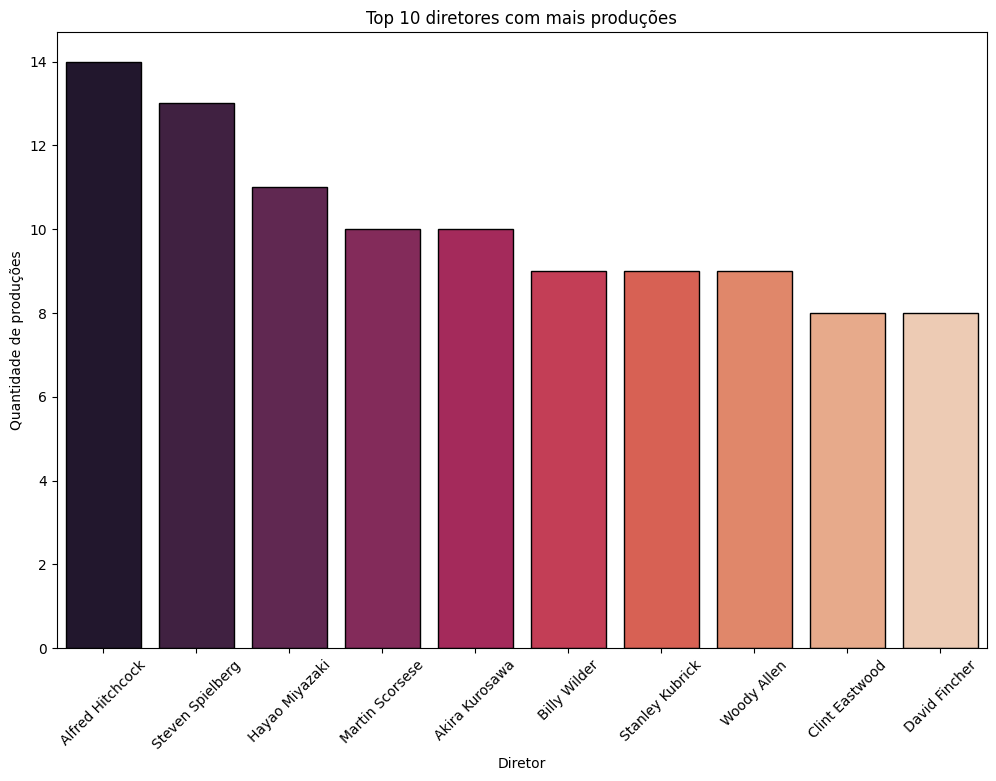

In [59]:
# Plotando o gráfico de colunas, que exibe os 10 diretores com mais produções  
plt.figure(figsize=(12, 8)) 
sns.barplot(x=df_top10_producoes_diretores.index, y=df_top10_producoes_diretores.values, palette="rocket", edgecolor="black", hue=df_top10_producoes_diretores.index) 
plt.title("Top 10 diretores com mais produções") 
plt.xlabel("Diretor") 
plt.ylabel("Quantidade de produções") 
plt.xticks(rotation=45) 
plt.show() 

In [60]:
# Média IMDB de cada diretor dentre os diretores com melhores notas 
df_top10_notas_diretores = df.groupby("Director")["IMDB_Rating"].mean().sort_values(ascending=False).head(10)
df_top10_notas_diretores

Director
Lana Wachowski        8.7
Irvin Kershner        8.7
Thomas Kail           8.6
Masaki Kobayashi      8.6
George Lucas          8.6
Frank Darabont        8.6
Sudha Kongara         8.6
Fernando Meirelles    8.6
Roberto Benigni       8.6
Milos Forman          8.5
Name: IMDB_Rating, dtype: float64

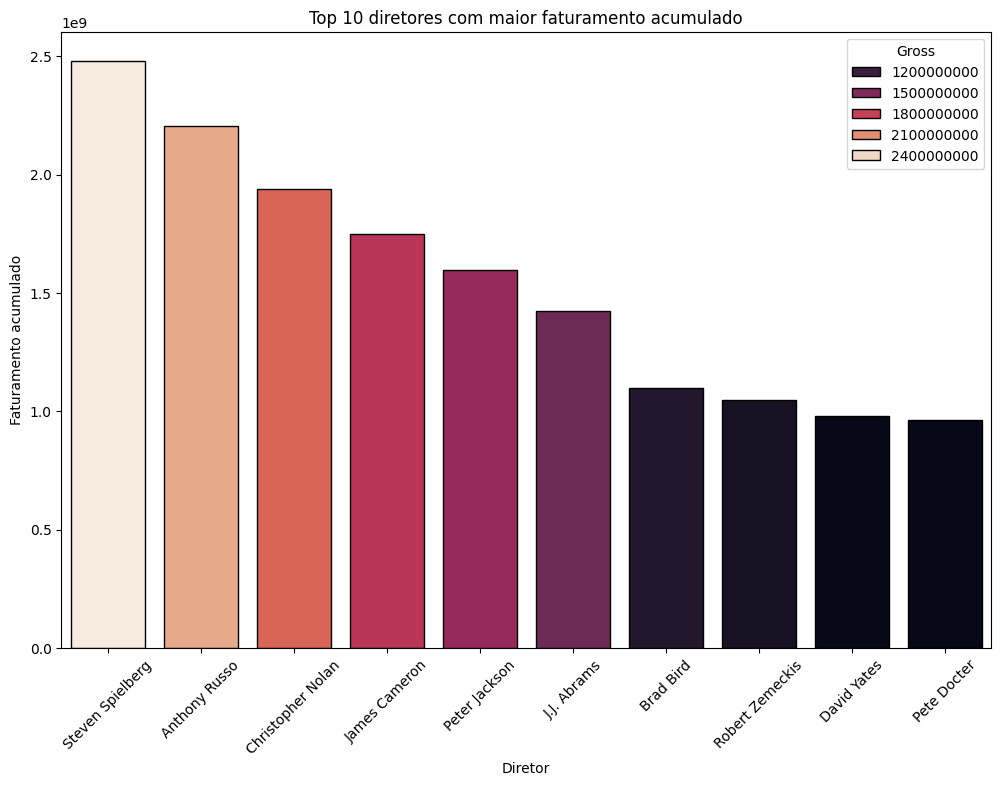

In [61]:
# Diretores com maiores faturamentos acumulados
df_top10_faturamento_diretores = df.groupby("Director")["Gross"].sum().sort_values(ascending=False).head(10)

# Plotando gráfico de colunas, que exibe o top 10 diretores com maior faturamento acumulado em suas produções
plt.figure(figsize=(12, 8))
sns.barplot(x=df_top10_faturamento_diretores.index, y=df_top10_faturamento_diretores.values, palette="rocket", edgecolor="black", hue=df_top10_faturamento_diretores)
plt.title("Top 10 diretores com maior faturamento acumulado")
plt.xlabel("Diretor")
plt.ylabel("Faturamento acumulado")
plt.xticks(rotation=45)
plt.show()

**Insights sobre os diretores**
- Os diretores com maior número de produções se destacam pela quantidade, mas não necessariamente pelas melhores notas ou pelo faturamento. Isso nos sugere que volume não significa qualidade ou sucesso financeiro.
- Os diretores com a melhor média de avaliação do IMDB não estão dentre os mais produtivos, indicando que qualidade e reconhecimento crítico não estão ligados a quantidade.
- Diretores com maior faturamento acumulado estão mais associados a blockbusters, como por exemplo o diretor Steven Spielberg.

In [62]:
# Top 10 atores protagonistas mais bem avaliados
df_atores_melhor_avaliados = df.groupby("Star1")["IMDB_Rating"].mean().sort_values(ascending=False).head(10)
df_atores_melhor_avaliados

Star1
John Travolta         8.90
Elijah Wood           8.80
Lilly Wachowski       8.70
Marlon Brando         8.65
Suriya                8.60
Lin-Manuel Miranda    8.60
Kátia Lund            8.60
Roberto Benigni       8.60
Daveigh Chase         8.60
Jodie Foster          8.60
Name: IMDB_Rating, dtype: float64

In [63]:
# Top 10 atores protagonistas com mais partifipações em filmes 
df_atores_mais_participacoes = df["Star1"].value_counts().nlargest(10)
df_atores_mais_participacoes

Star1
Tom Hanks            11
Robert De Niro       11
Al Pacino            10
Clint Eastwood       10
Leonardo DiCaprio     9
Humphrey Bogart       9
Christian Bale        8
James Stewart         8
Johnny Depp           8
Toshirô Mifune        7
Name: count, dtype: int64

In [64]:
# Top 10 atores protagonistas com maior faturamento acumulado em produções que tiveram participação
df_atores_faturamento_acumulado = df.groupby("Star1")["Gross"].sum().sort_values(ascending=False).head(10)
df_atores_faturamento_acumulado

Star1
Tom Hanks            2.319260e+09
Joe Russo            2.205039e+09
Leonardo DiCaprio    1.877322e+09
Daniel Radcliffe     1.835901e+09
Christian Bale       1.351591e+09
Robert Downey Jr.    1.150720e+09
Elijah Wood          1.035942e+09
Daisy Ridley         9.366622e+08
Mark Hamill          9.223406e+08
Craig T. Nelson      8.700228e+08
Name: Gross, dtype: float64

**Insights sobre os atores protagonistas**
- Os atores protagonistas com melhor avaliação média não estão entre os atores com mais participações, o que pode indicar que quantidade de produções não significa qualidade, e que por mais que os atores com mais participações sejam muito bons, projetos ruins podem diminuir a sua média de avaliação.
- Atores com mais participações são bastante conhecidos principalmente por atuações em blockbusters, como: Tom Hanks, Leonardo DiCaprio, Christian Bale, Johnny Depp, etc. 
- Tanto atores com melhor avaliação quanto atores com mais participações estão na lista de atores com maior faturamento acumulado em produções onde tiveram sua participação, indicando que uma das regras para bons faturamento é a presença de atores populares e bem avaliados pelo público.


--------------------------------------------------------------------------------------------------------------------------------------------------------

# Modelagem 

### Para previsão de valores númericos contínuos, como a avaliação IMDb, a Regressão Linear é o melhor modelo a ser utilizado

In [65]:
# Importando as bibliotecas necessárias 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [66]:
# Selecionando os dados para o treinamento do modelo
features_numericas = ["Runtime", "Meta_score", "No_of_Votes", "Gross"]
feature_categorica = df["Genero_Principal"]
generos_convertidos = pd.get_dummies(feature_categorica, prefix="Genre", drop_first=True) # Utilizando a técnica do One-Hot-Encoding para preparação das variáveis categóricas 

# Separando os dados que serão utilizados pelo modelo
X = pd.concat([df[["Runtime", "Meta_score", "No_of_Votes", "Gross"]], generos_convertidos], axis=1) # Features (etiquetas) -> Variável independente
y = df["IMDB_Rating"] # Target (rótulo) -> variável dependente

In [67]:
# Separando os dados em conjuntos de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciação do modelo de Regressão Linear
modelo = LinearRegression()

# Validação cruzada 
# # Métricas de avaliação dos folds 
metricas_avaliacao = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'] # MAE, MSE e R2 são as métricas de avaliação 
cv_results = cross_validate(modelo, X_train, y_train, cv=5, scoring=metricas_avaliacao)

print("----- Média das métricas de validação cruzada -----")
print(f"Tempo médio de treino por fold: {cv_results["fit_time"].mean():.4f}")
print(f"MAE médio: {-cv_results['test_neg_mean_absolute_error'].mean():.4f}")
print(f"RMSE médio: {np.sqrt(-cv_results["test_neg_mean_squared_error"]).mean():.4f}")
print(f"R2 médio: {cv_results["test_r2"].mean():.4f}")
print("---------------------------------------------------")

----- Média das métricas de validação cruzada -----
Tempo médio de treino por fold: 0.0018
MAE médio: 0.1708
RMSE médio: 0.2115
R2 médio: 0.3686
---------------------------------------------------


In [68]:
# Treinamento do modelo 
modelo.fit(X_train, y_train)

# Previsões com o conjunto de teste
y_pred = modelo.predict(X_test)

# Calculando as métricas de avaliação do modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("----- Métricas de avaliação do modelo -----")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2: {r2:.2f}")
print("-------------------------------------------")

----- Métricas de avaliação do modelo -----
Mean Absolute Error: 0.18
Mean Squared Error: 0.05
Root Mean Squared Error: 0.22
R2: 0.39
-------------------------------------------


In [69]:
# Transformando o resultado em um dataframe 
resultado = pd.DataFrame({"y_real": y_test, "y_pred": y_pred})
resultado

,y_real,y_pred
453,8.0,8.039029
792,7.7,7.844092
209,8.1,8.244047
309,8.1,7.878682
739,7.7,7.880362
...,...,...
314,8.1,7.846705
404,8.0,7.986972
7,8.8,8.738551
155,8.2,8.054829


In [70]:
# Predição do novo filme 
filme = {'Series_Title': 'The Shawshank Redemption',
'Released_Year': '1994',
'Certificate': 'A',
'Runtime': 142,
'Genre': 'Drama',
'Overview': "Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",
'Meta_score': 80.0,
'Director': 'Frank Darabont',
'Star1': 'Tim Robbins',
'Star2': 'Morgan Freeman',
'Star3': 'Bob Gunton',
'Star4': 'William Sadler',
'No_of_Votes': 2343110,
'Gross': 28341469}

df_filme = pd.DataFrame([filme])
df_filme

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469


In [71]:
# Criando a feature de gênero principal no dataframe do filme a ser previsto
df_filme['Genero_Principal'] = df_filme['Genre'].str.split(',').str[0]

# Selecionando as features numéricas 
features_numericas_novo = ["Runtime", "Meta_score", "No_of_Votes", "Gross"]
dados_numericos_novo = df_filme[features_numericas_novo]
generos_convertidos_novo = pd.get_dummies(df_filme['Genero_Principal'], prefix="Genre") # a feature categórica é convertida em numérica através da técnica de One-Hot-Encoding

X_novo = pd.concat([dados_numericos_novo, generos_convertidos_novo], axis=1) # Features (etiquetas) -> Variável independente

# Seleciona as colunas dos dados de treino (features)
colunas_do_modelo = X_train.columns 

# Adequa o novo dataframe para que tenha as mesmas colunas do dataframe de treinamento
X_novo_final = X_novo.reindex(columns=colunas_do_modelo, fill_value=0)

# Fazendo a predição da nota IMDb do filme 'The Shawshank Redemption'
previsao_nota_filme = modelo.predict(X_novo_final)

# Exibindo os resultados 
nota_real = 9.3 # Nota disponível no dataset 
nota_prevista = previsao_nota_filme[0]
erro = abs(nota_real - nota_prevista)

print("--- Predição para Novo Filme ---")
print(f"Filme: {df_filme['Series_Title'].iloc[0]}")
print(f"Nota Real (IMDb): {nota_real}")
print(f"Nota Prevista pelo Modelo: {nota_prevista:.2f}")
print(f"Erro da Predição: {erro:.2f} pontos")
print("---------------------------------")

# Análise do resultado
print(f"O erro de {erro:.2f} pontos está consistente com o Erro Médio Absoluto (MAE) de {mae:.2f} do nosso modelo, isso confirma que o modelo está se comportando como esperado em um exemplo individual.")

--- Predição para Novo Filme ---
Filme: The Shawshank Redemption
Nota Real (IMDb): 9.3
Nota Prevista pelo Modelo: 9.15
Erro da Predição: 0.15 pontos
---------------------------------
O erro de 0.15 pontos está consistente com o Erro Médio Absoluto (MAE) de 0.18 do nosso modelo, isso confirma que o modelo está se comportando como esperado em um exemplo individual.


# Repondendo as perguntas do desafio

### 2) 
### a. Qual filme você recomendaria para uma pessoa que você não conhece? 

Resposta: Para uma pessoa desconhecida, o ideal seria a indicação de um filme pertencente a um gênero de maior sucesso, com uma boa nota do público e da crítica, uma quantidade alta de número de votos, um diretor e atores conceituados. Um ótimo filme a ser indicado é Titanic, pois está entre os 10 filmes de maior faturamento e popularidade da história, é do gênero (Drama) mais popular, tem um dos diretores mais bem conceituados (James Cameron) e um dos atores mais populares e com maior faturamento acumulado (Leonardo DiCaprio). Além disso, possui alta nota tanto do público quanto da crítica e alto número de votos, então com toda certeza é um dos filmes mais adequados a se indicar a alguém desconhecido. 

### b. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?  

Resposta: Dentre os fatores determinantes para um alto faturamento de um filme, os que mais se destacam são a escolhas de um diretor conceituado, um protagonista com alta média de avaliação e popularidade, e também o gênero do filme, que impacta significativamente no seu provável sucesso de bilheteria. Uma alta quantidade de votos, e também uma alta avaliação tanto do público quanto da crítica são essenciais para o sucesso de faturamento de uma produção.

### c. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna? 

Resposta: A partir da coluna Overview podemos tirar insights significativos, como: o tema do filme, a análise dos sentimentos (NLP) a partir da sinopse (indicando se é um filme com uma temática mais positiva ou negativa), padrões de protagonistas ou diretores, etc. Sim, é possível inferir o gênero a partir do Overview, sendo através de padrões detectados em um estilo de vocabulário, ou na temática e nos sentimentos no texto, dessa forma um modelo de machine learning (utilizando PLN) pode aprender a inferir uma correlação bem definida entre as características no texto que permita classificar os gêneros. 

### 3) Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê? 

Resposta: Para prever uma nota imdb a partir dos dados disponibilizados, um modelo de Regressão Linear é o método mais adequado, pois a saída esperada é uma variável numérica e contínua. As variáveis utilizadas para o treinamento do modelo são: Runtime (tempo de execução), Meta_score (média ponderada de todas as críticas), Gross (faturamento), No_of_Votes (número de votos) e Genero_Principal (gênero). A variável Genero_Principal passou pela transformação da técnica do One-Hot-Encoding, pois era uma variável categórica em formato de texto, e a transformação a dividiu em diversas variáveis numéricas, atribuindo o valor 0 quando o filme não pertencia a determinado gênero e o valor 1 quando o filme era do respectivo gênero. A principal vantagem da Regressão Linear é sua alta interpretabilidade e simplicidade, pois é fácil entender como cada variável impacta o resultado final, a principal desvantagem é que, por ser um modelo simples, ela pode ter uma performance inferior a modelos mais complexos, pois só consegue capturar relações lineares entre as variáveis.. A medida de performance utilizada o RMSE, que mensura a distância do valor previsto para os valores reais.

### 4) Supondo um filme com as seguintes características: 
{'Series_Title': 'The Shawshank Redemption', 
'Released_Year': '1994', 
'Certificate': 'A', 
'Runtime': '142 min', 
'Genre': 'Drama', 
'Overview': 'Two imprisoned men bond over a number of years, 
finding solace and eventual redemption through acts of common 
decency.', 
'Meta_score': 80.0, 
'Director': 'Frank Darabont', 
'Star1': 'Tim Robbins', 
'Star2': 'Morgan Freeman', 
'Star3': 'Bob Gunton', 
'Star4': 'William Sadler', 
'No_of_Votes': 2343110, 
'Gross': '28,341,469'} 
Qual seria a nota do IMDB? 

Resposta: A nota para esse filme, utilizando o modelo treinado de regressão linear, seria 9,15.

In [72]:
import joblib 

# Salva o modelo no arquivo .pkl
joblib.dump(modelo, 'modelo_imdb.pkl')

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!
